In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
# Load data
df = pd.read_csv("/content/supply_chain_data.csv",on_bad_lines='skip')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (2,4,6,7,13,19,20,22,23,27,30,31,32,33,34,35,37,39,42,43,45,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [6]:
df=df[:2000]

In [28]:
ndf=df[[ 'Late_delivery_risk', 'Order Region','Shipping Mode']]

In [29]:
ndf.head()

,Late_delivery_risk,Order Region,Shipping Mode
0,0,Southeast Asia,Standard Class
1,1,South Asia,Standard Class
2,0,South Asia,Standard Class
3,0,Oceania,Standard Class
4,0,Oceania,Standard Class


In [30]:
df_ohe=pd.get_dummies(ndf)

In [37]:
from sklearn.cluster import KMeans

kmeans = KMeans(5)
clusters = kmeans.fit_predict(df_ohe)
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((ndf,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
from sklearn.metrics import silhouette_score
kmns=KMeans(n_clusters=5).fit(df_ohe)
label = kmns.labels_
silhouette = silhouette_score(df_ohe, label)
print("Silhouette score for customer segmentation: ", silhouette)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for customer segmentation:  0.23837983727762282


In [39]:
labeledCustomers.head()

,Late_delivery_risk,Order Region,Shipping Mode,labels
0,0,Southeast Asia,Standard Class,1
1,1,South Asia,Standard Class,2
2,0,South Asia,Standard Class,1
3,0,Oceania,Standard Class,4
4,0,Oceania,Standard Class,4


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 93.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try swarmplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.7% of the points cannot be placed; you may want to

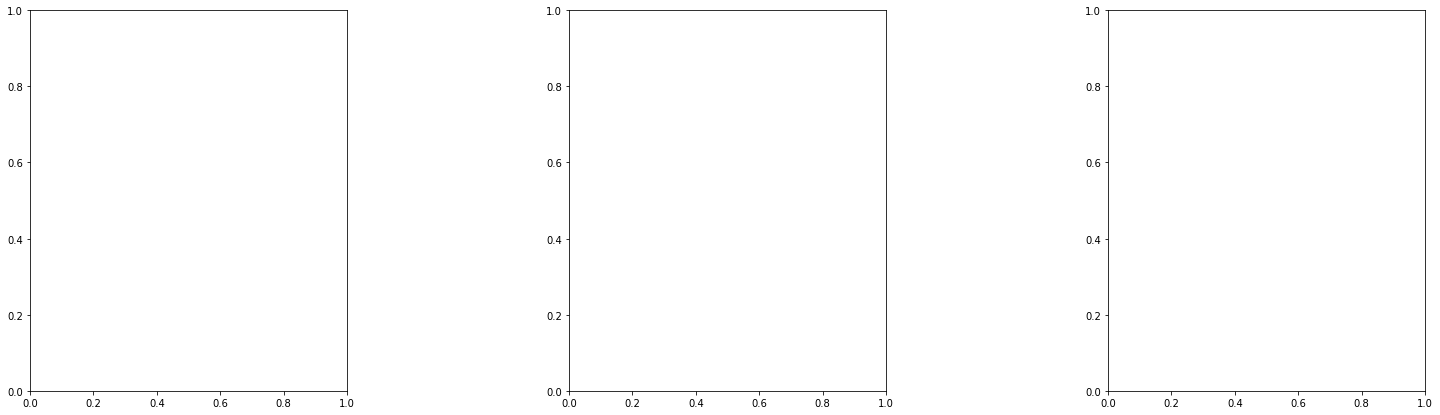

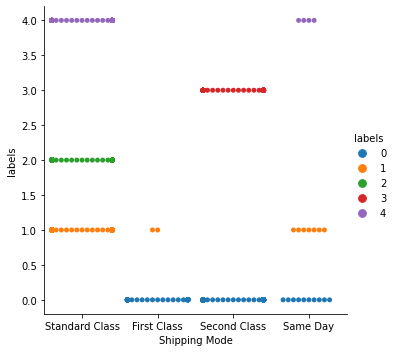

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns



f, axes = plt.subplots(1, 3, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)

for i in range(len(labeledCustomers.columns)-1):
    col = labeledCustomers.columns[i]
    sns.catplot(x=col, y='labels', kind="swarm", hue='labels', data=labeledCustomers,ax=axes[i])
    # else:
    #     ax = sns.swarmplot(x=labeledCustomers['Constant'],y=labeledCustomers[col].values,hue=labeledCustomers['labels'],ax=axes[i])
    #     ax.set_title(col)
        
plt.close(2)
plt.close(3)
plt.show()

In [42]:
customer_data = df[['Customer State', 'Late_delivery_risk']]
customer_data = pd.get_dummies(customer_data)
kmeans = KMeans(n_clusters=4, random_state=0).fit(customer_data)
labels = kmeans.labels_
silhouette = silhouette_score(customer_data, labels)
print("Silhouette score for customer segmentation: ", silhouette)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for customer segmentation:  0.5872448705561751


In [44]:
customer_data.head()

,Customer State_AR,Customer State_AZ,Customer State_CA,Customer State_CO,Customer State_CT,Customer State_DC,Customer State_DE,Customer State_FL,Customer State_GA,Customer State_HI,...,Customer State_SC,Customer State_TN,Customer State_TX,Customer State_UT,Customer State_VA,Customer State_WA,Customer State_WI,Customer State_WV,Late_delivery_risk_0,Late_delivery_risk_1
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
customer_data.iloc[:, 0]

0       0
1       0
2       0
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: Customer State_AR, Length: 2000, dtype: uint8

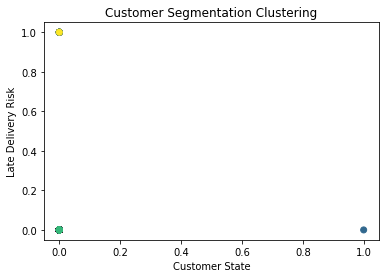

In [43]:
plt.scatter(customer_data.iloc[:, 0], customer_data.iloc[:, 1], c=labels, cmap='viridis')
plt.title('Customer Segmentation Clustering')
plt.xlabel('Customer State')
plt.ylabel('Late Delivery Risk')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for product clustering:  0.3492144005433584


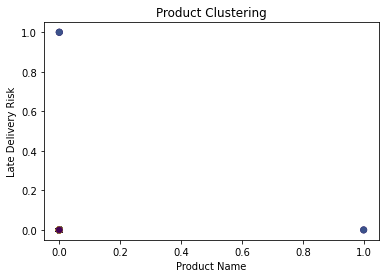

In [46]:
product_data = df[['Product Name', 'Late_delivery_risk']]
product_data = pd.get_dummies(product_data)
kmeans = KMeans(n_clusters=5, random_state=0).fit(product_data)
labels = kmeans.labels_
silhouette = silhouette_score(product_data, labels)
print("Silhouette score for product clustering: ", silhouette)

# Plot Product Clustering
plt.scatter(product_data.iloc[:, 0], product_data.iloc[:, 1], c=labels, cmap='viridis')
plt.title('Product Clustering')
plt.xlabel('Product Name')
plt.ylabel('Late Delivery Risk')
plt.show()


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for regional clustering:  0.26065679115639623


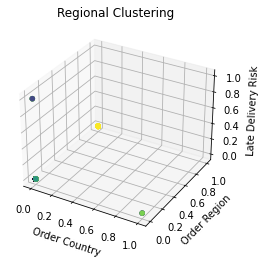

In [47]:
region_data = df[['Order Country', 'Order Region', 'Late_delivery_risk']]
region_data = pd.get_dummies(region_data)
kmeans = KMeans(n_clusters=6, random_state=0).fit(region_data)
labels = kmeans.labels_
silhouette = silhouette_score(region_data, labels)
print("Silhouette score for regional clustering: ", silhouette)

# Plot Regional Clustering
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(region_data.iloc[:, 0], region_data.iloc[:, 1], region_data.iloc[:, 2], c=labels, cmap='viridis')
ax.set_title('Regional Clustering')
ax.set_xlabel('Order Country')
ax.set_ylabel('Order Region')
ax.set_zlabel('Late Delivery Risk')
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette score for late delivery clustering:  0.8270484066894216


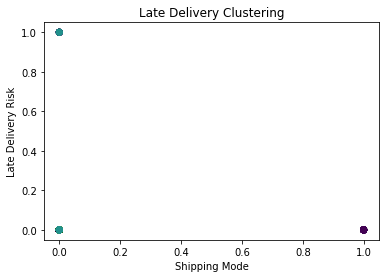

In [48]:
# Late Delivery Clustering
late_delivery_data = df[['Shipping Mode', 'Late_delivery_risk']]
late_delivery_data = pd.get_dummies(late_delivery_data)
kmeans = KMeans(n_clusters=3, random_state=0).fit(late_delivery_data)
labels = kmeans.labels_
silhouette = silhouette_score(late_delivery_data, labels)
print("Silhouette score for late delivery clustering: ", silhouette)

# Plot Late Delivery Clustering
plt.scatter(late_delivery_data.iloc[:, 0], late_delivery_data.iloc[:, 1], c=labels, cmap='viridis')
plt.title('Late Delivery Clustering')
plt.xlabel('Shipping Mode')
plt.ylabel('Late Delivery Risk')
plt.show()